In [1]:
import csv
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,8)
x=np.linspace(5.0,140.0,140)

In [2]:
flow=np.array([])
ball=np.array([])
with open('E602_SN2-37_Argon_SS.csv', newline='') as csvfile:
    fcsv=csv.reader(csvfile, delimiter=',')
    n=0
    for row in fcsv:
        n+=1
        if n==1: continue 
        flow=np.append(flow,float(row[0]))
        ball=np.append(ball,float(row[1]))

In [3]:
arflowSS_tube=interpolate.interp1d(ball,flow)

In [4]:
ro,cal=np.loadtxt('ARGON_602(E300)_SS_0_PSIG.dat',unpack=True) # sccm
arflowSS_typical=interpolate.interp1d(ro, cal)

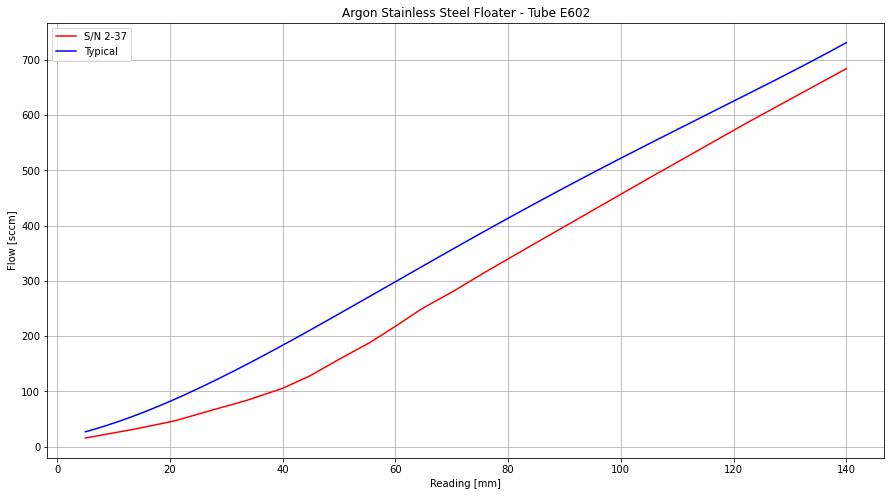

In [7]:
plt.plot(x, arflowSS_tube(x), 'r', label='S/N 2-37')
plt.plot(x, arflowSS_typical(x), 'b', label='Typical')
plt.title('Argon Stainless Steel Floater - Tube E602')
plt.xlabel('Reading [mm]')
plt.ylabel('Flow [sccm]')
plt.grid()
plt.legend(loc='upper left')
plt.show()